In [1]:
import egamma_tnp
import dask_awkward as dak
import dask
from coffea.dataset_tools import preprocess
from distributed import Client
from egamma_tnp.triggers import TagNProbeFromNTuples
from egamma_tnp.plot import plot_efficiency
from matplotlib import pyplot as plt

In [2]:
ele32_filters = [
    "hltEG32L1SingleEGOrEtFilter",
    "hltEle32WPTightClusterShapeFilter",
    "hltEle32WPTightHEFilter",
    "hltEle32WPTightEcalIsoFilter",
    "hltEle32WPTightHcalIsoFilter",
    "hltEle32WPTightPixelMatchFilter",
    "hltEle32WPTightPMS2Filter",
    "hltEle32WPTightGsfOneOEMinusOneOPFilter",
    "hltEle32WPTightGsfMissingHitsFilter",
    "hltEle32WPTightGsfDetaFilter",
    "hltEle32WPTightGsfDphiFilter",
    "hltEle32WPTightGsfTrackIsoFilter",
]

In [3]:
client = Client()

fileset = {
    "DY_LO_2023postBPIX": {
        "files": {"tnptuples/mc_DY_LO_2023postBPIX.root": "tnpEleTrig/fitter_tree"}
    },
    "DY_LO_MLL50_2024": {
        "files": {"tnptuples/mc_DY_LO_MLL50_2024.root": "tnpEleTrig/fitter_tree"}
    },
}

fileset_available, fileset_updates = preprocess(fileset, skip_bad_files=True, step_size=500_000)

In [4]:
egamma_tnp.config.set(
    "ptbins",
    [
        5,
        10,
        12,
        14,
        16,
        18,
        20,
        23,
        26,
        28,
        30,
        32,
        34,
        36,
        38,
        40,
        45,
        50,
        60,
        80,
        100,
        150,
        250,
        400,
    ],
)

to_compute = {}

for filter in ele32_filters:
    tnp = TagNProbeFromNTuples(fileset_available, f"pass{filter.replace('hlt', 'HLT')}")
    to_compute[filter] = tnp.get_tnp_histograms(
        eta_regions_pt={
            "barrel": [0.0, 1.4442],
            "endcap_loweta": [1.566, 2.0],
            "endcap_higheta": [2.0, 2.5],
        },
        plateau_cut=35,
        uproot_options={"allow_read_errors_with_report": True}
    )

dak.necessary_columns(to_compute)

{'from-uproot-4ea5d931a34cd33a22d873bcf16d888a': frozenset({'el_eta',
            'el_phi',
            'el_pt',
            'pair_mass',
            'passHLTEG32L1SingleEGOrEtFilter',
            'passHLTEle32WPTightClusterShapeFilter',
            'passHLTEle32WPTightEcalIsoFilter',
            'passHLTEle32WPTightGsfDetaFilter',
            'passHLTEle32WPTightGsfDphiFilter',
            'passHLTEle32WPTightGsfMissingHitsFilter',
            'passHLTEle32WPTightGsfOneOEMinusOneOPFilter',
            'passHLTEle32WPTightGsfTrackIsoFilter',
            'passHLTEle32WPTightHEFilter',
            'passHLTEle32WPTightHcalIsoFilter',
            'passHLTEle32WPTightPMS2Filter',
            'passHLTEle32WPTightPixelMatchFilter',
            'passingCutBasedTight122XV1',
            'tag_Ele_pt'}),
 'from-uproot-2301c60d801807b3cd4f58259ff7ff2a': frozenset({'el_eta',
            'el_phi',
            'el_pt',
            'pair_mass',
            'passHLTEG32L1SingleEGOrEtFilter',
          

In [5]:
%%time

out = dask.compute(to_compute)[0]

CPU times: user 16 s, sys: 558 ms, total: 16.6 s
Wall time: 19.9 s


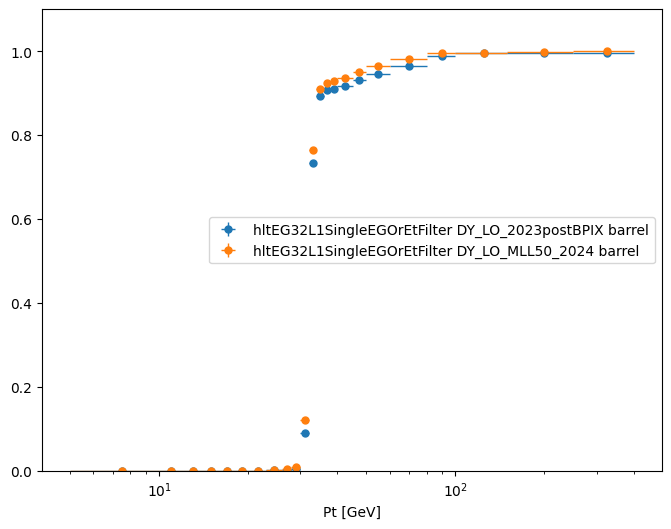

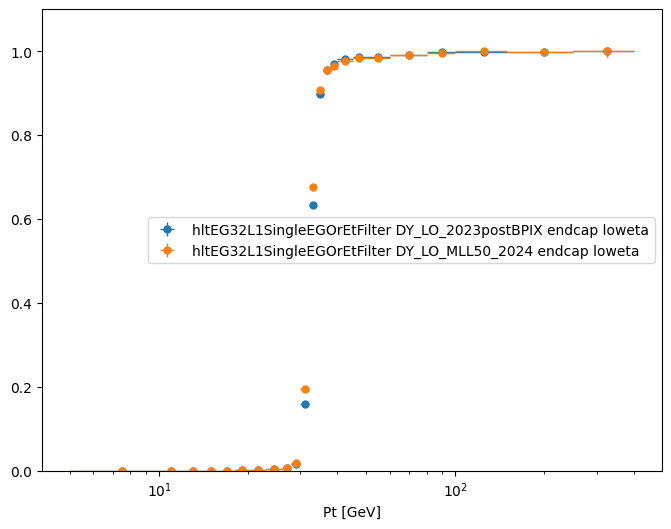

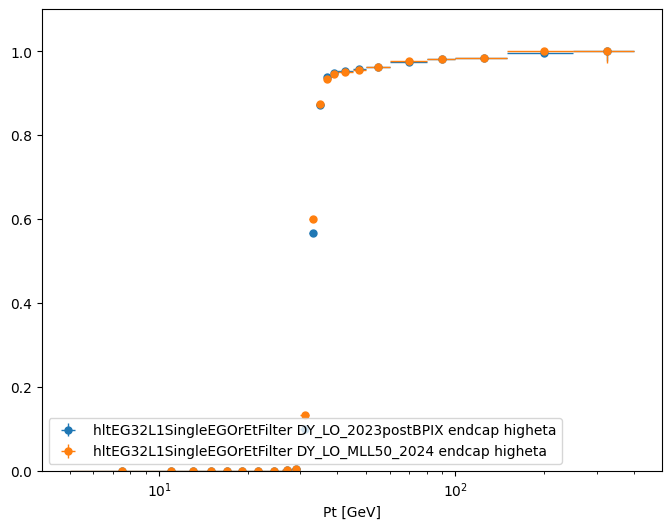

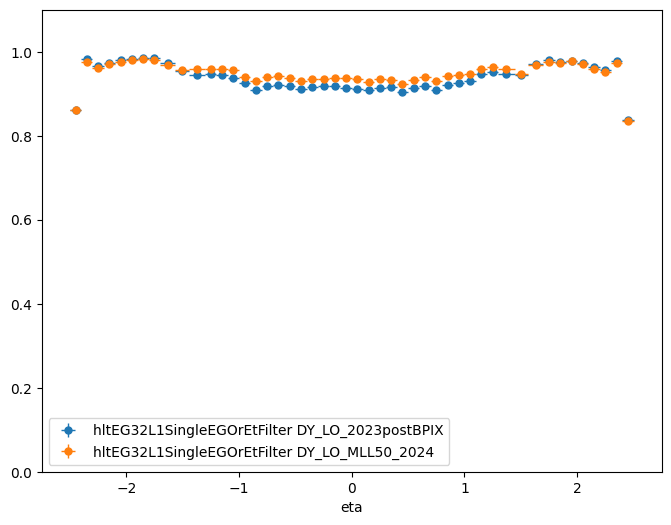

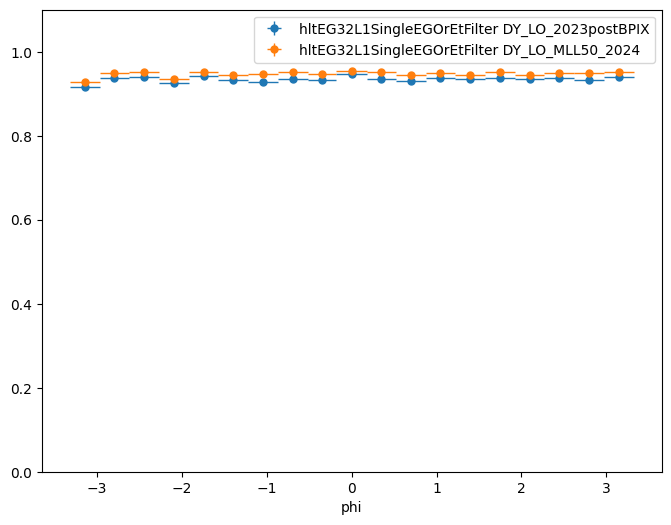

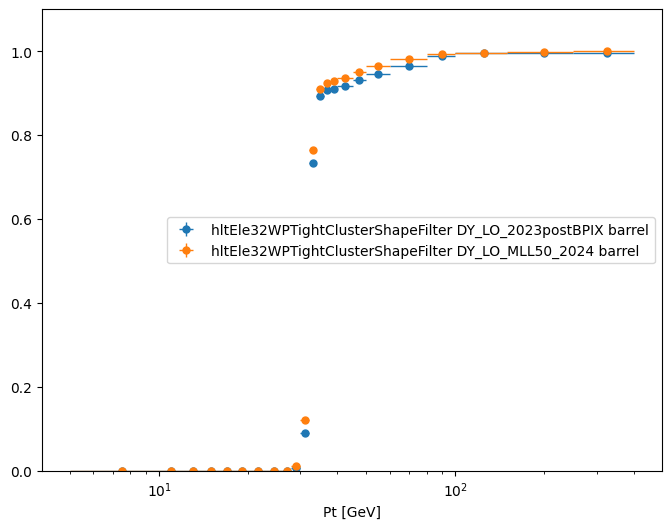

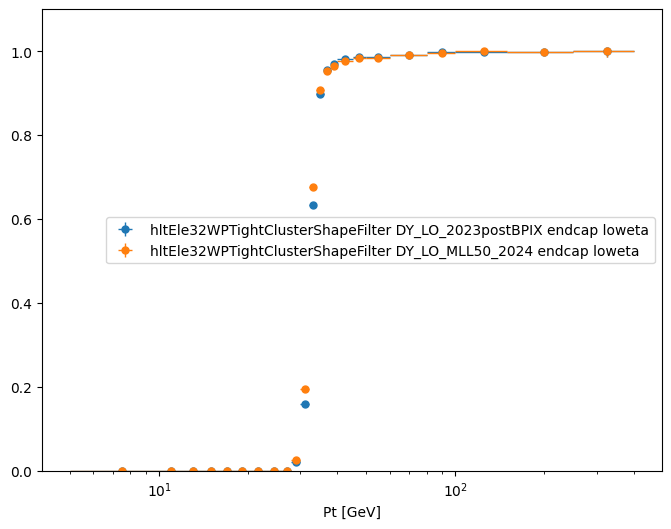

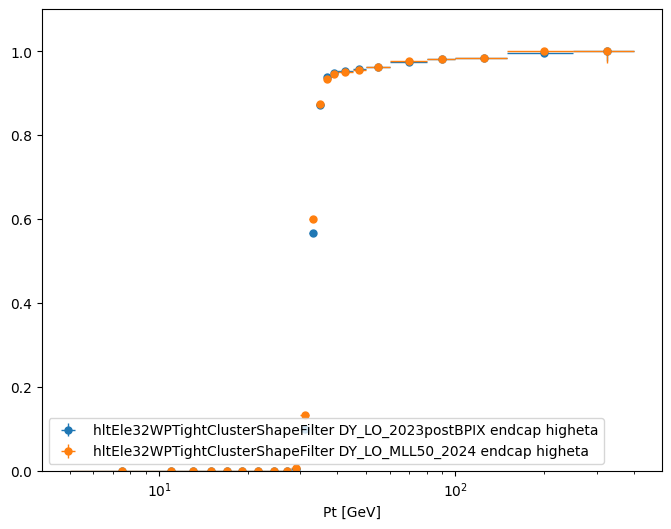

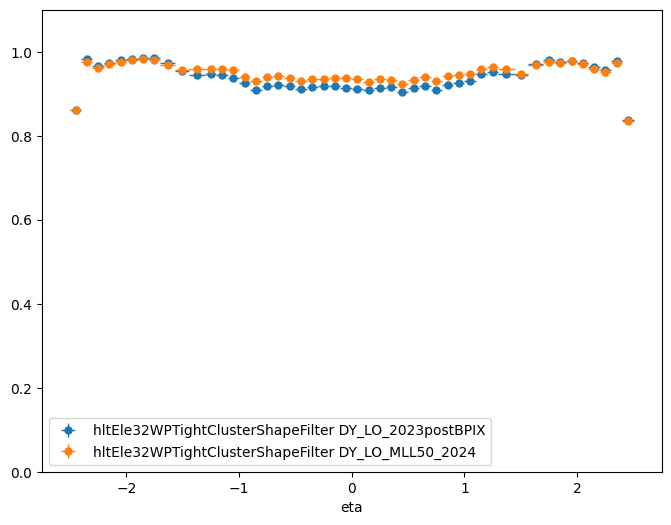

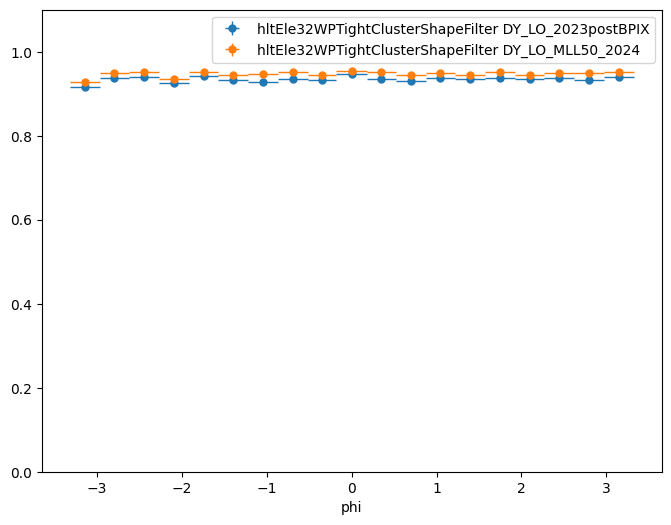

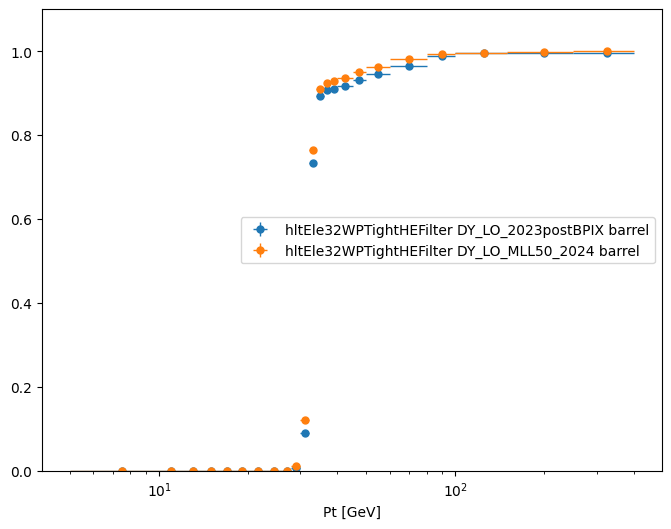

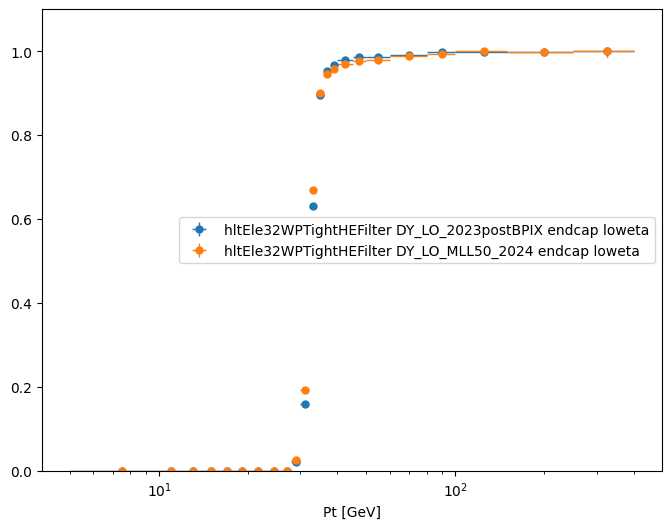

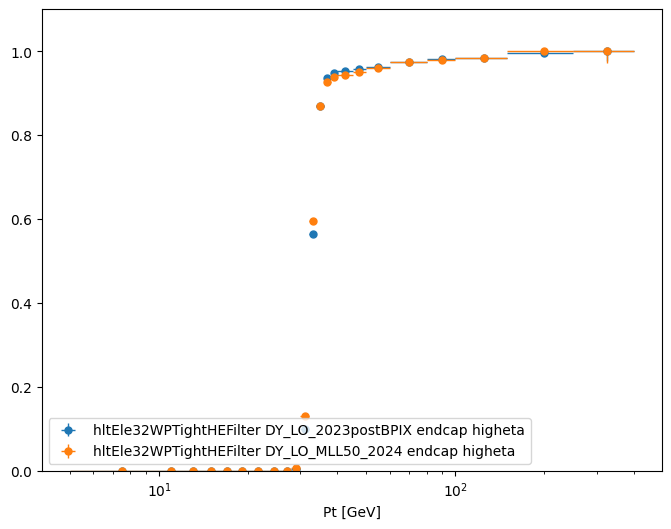

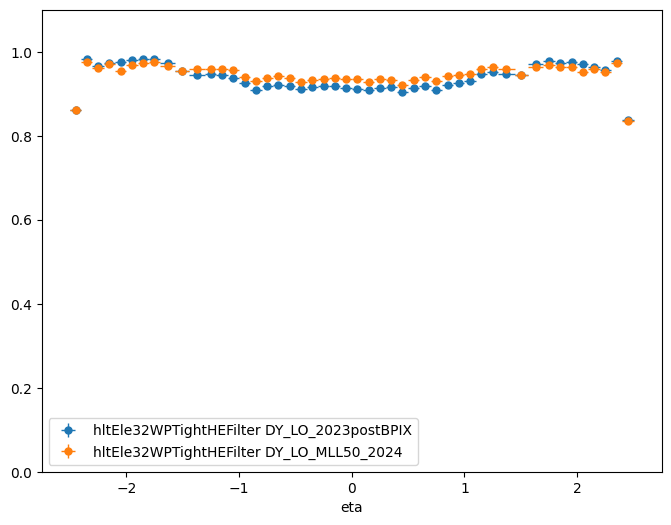

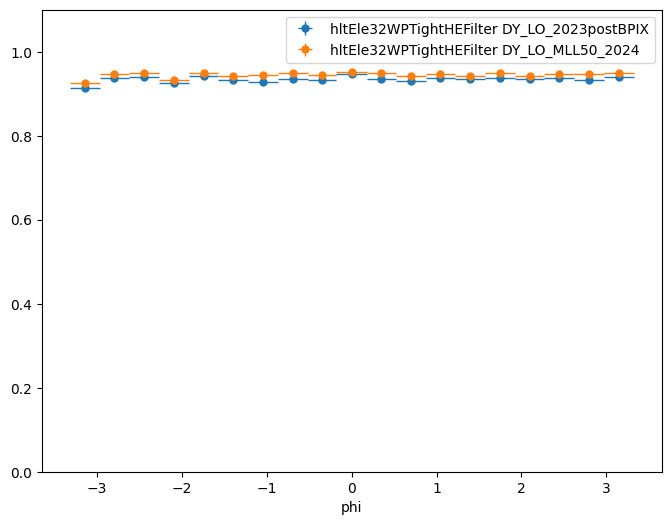

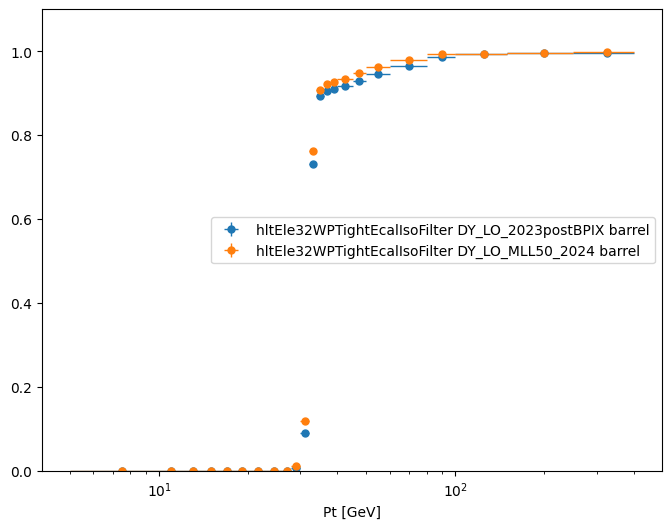

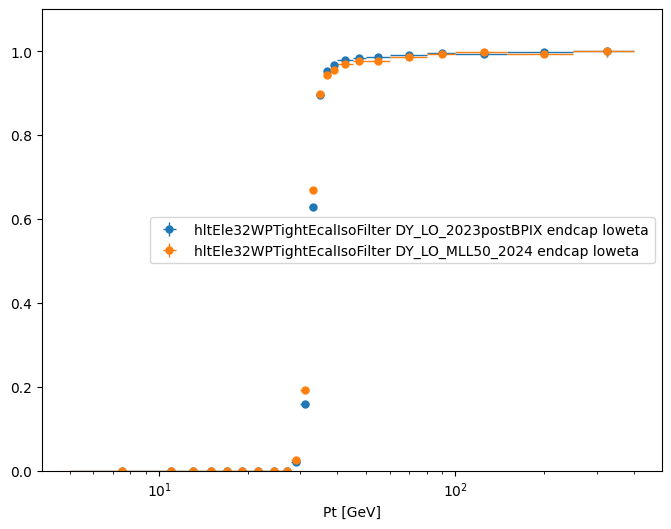

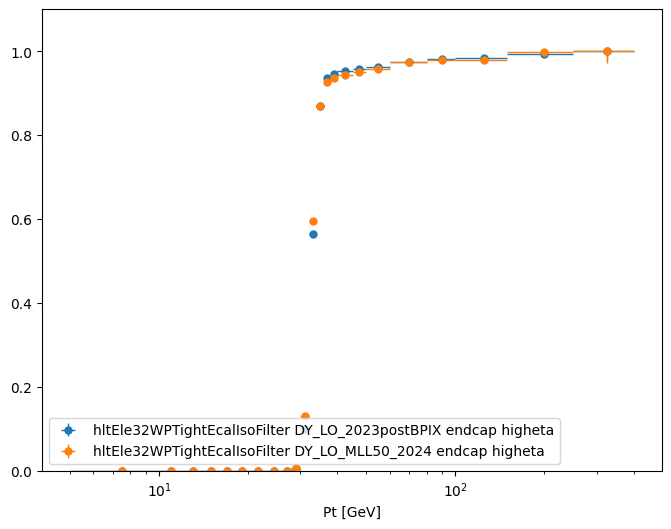

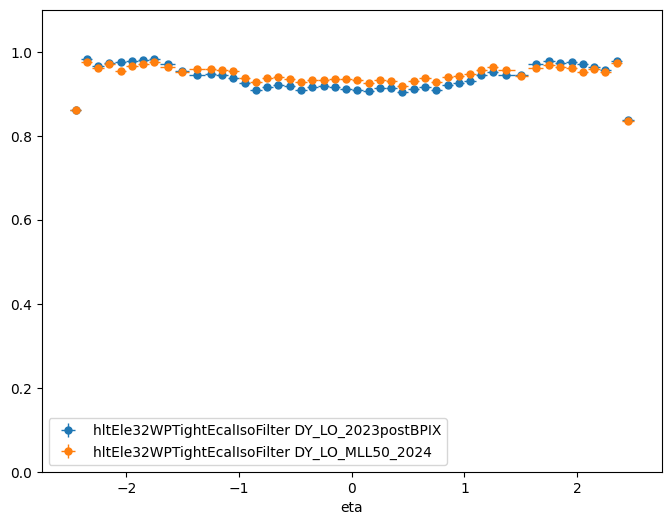

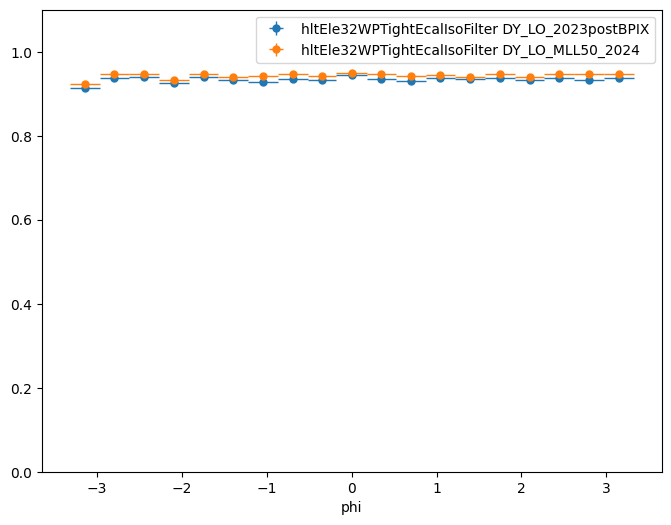

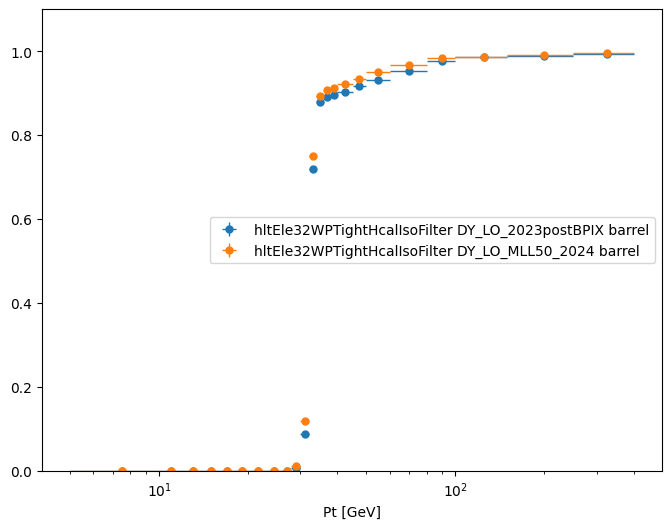

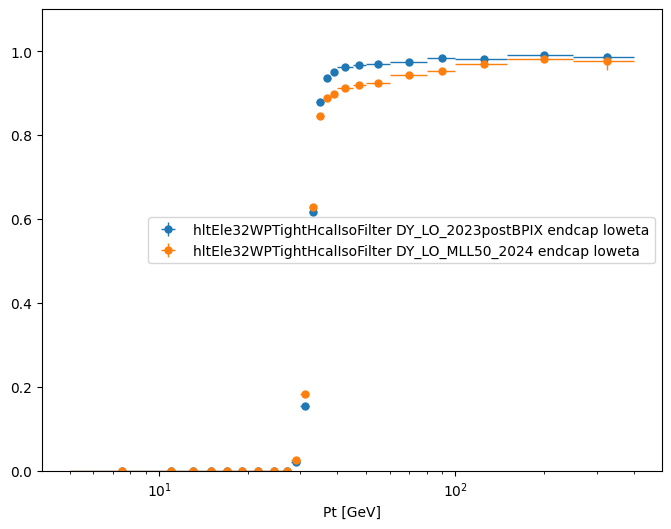

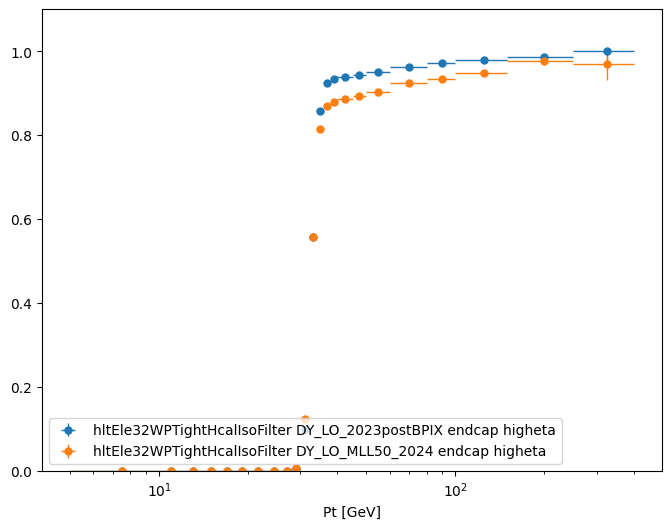

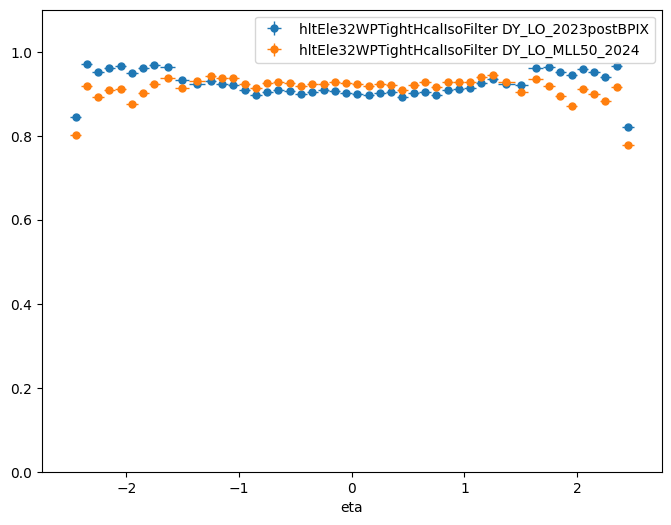

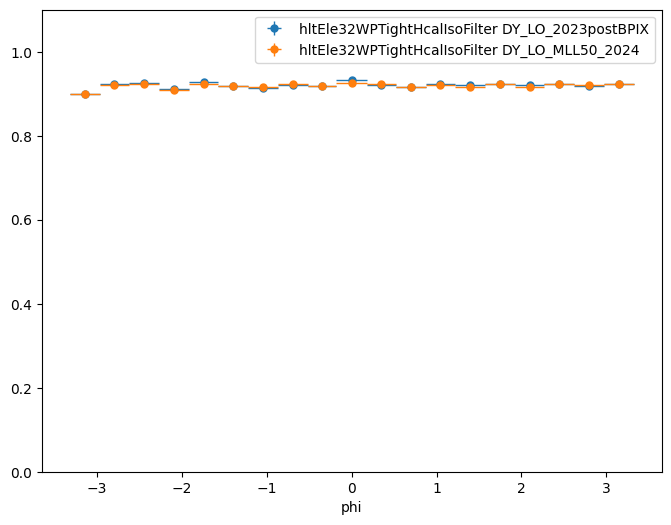

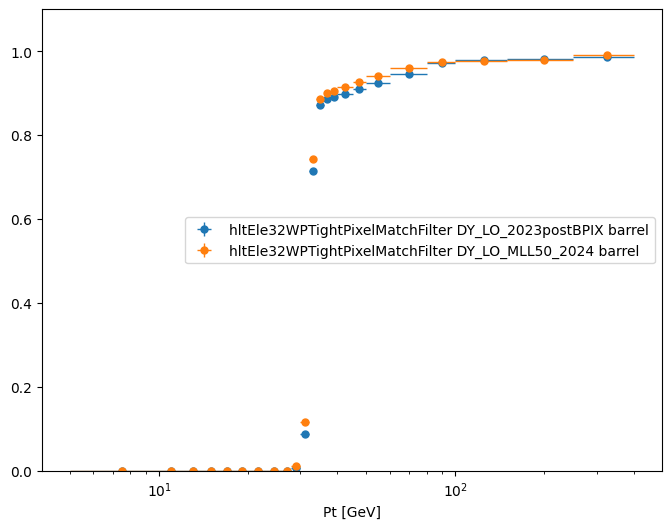

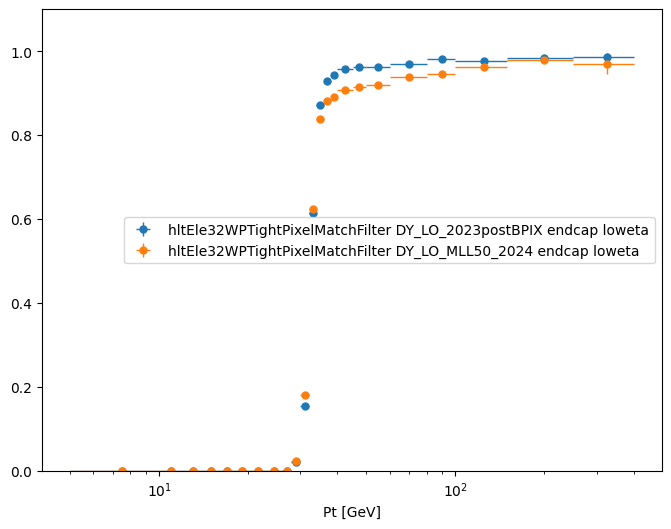

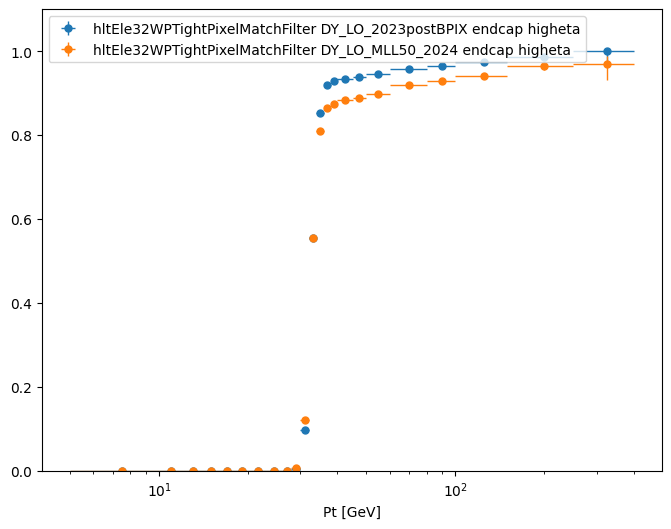

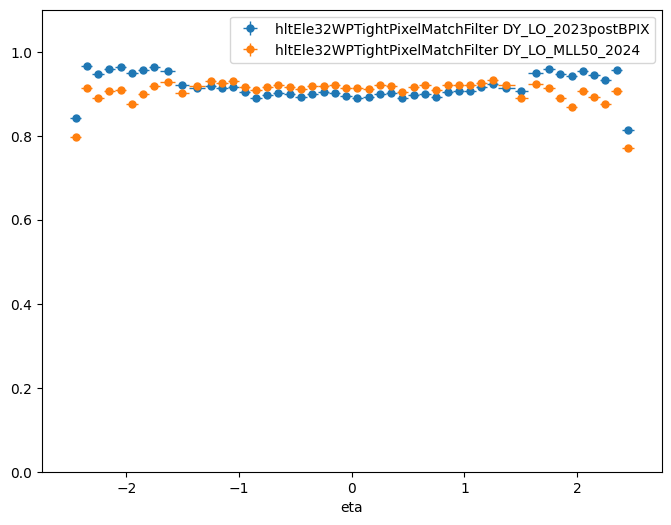

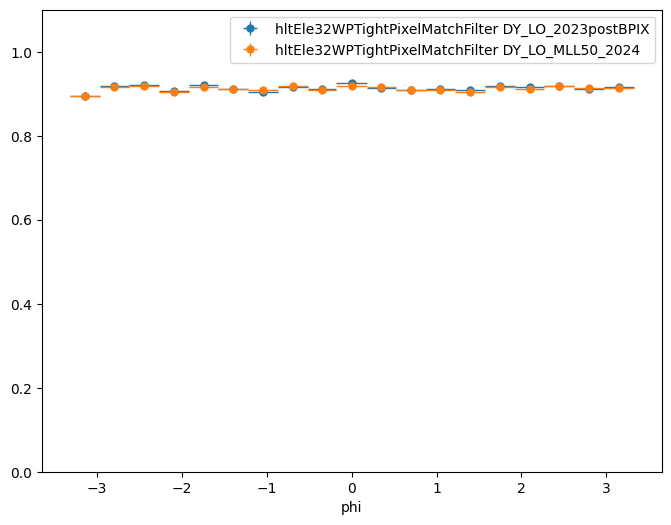

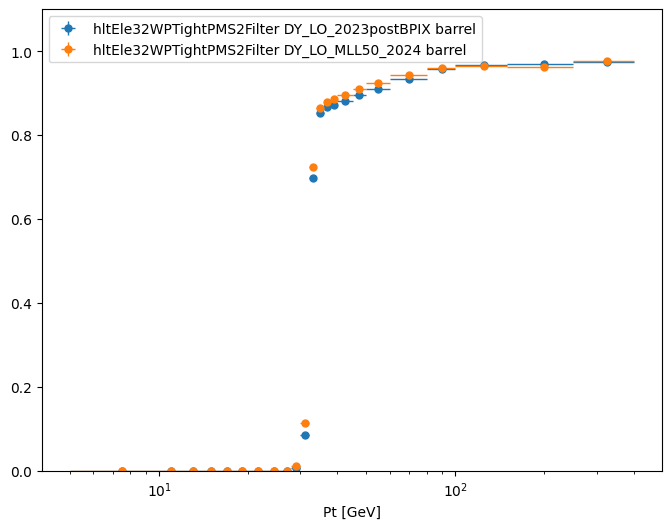

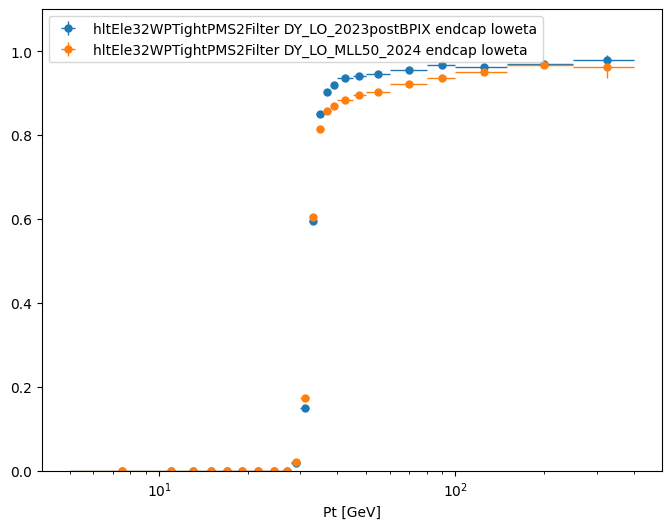

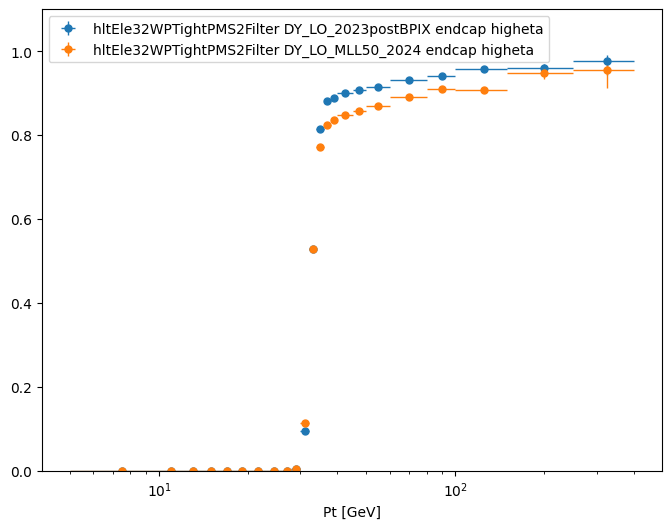

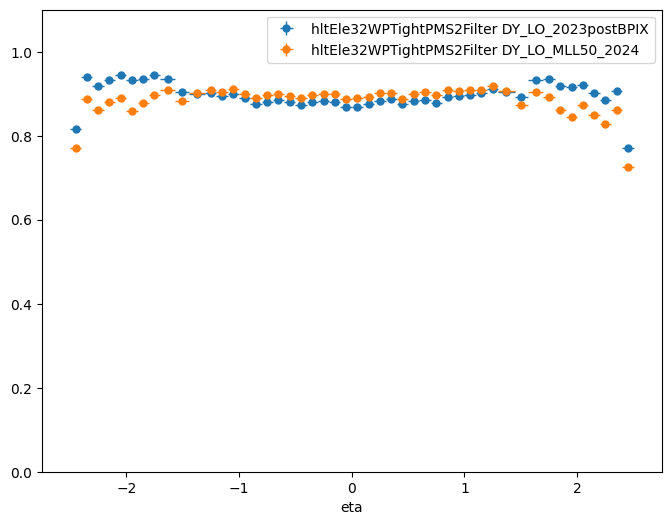

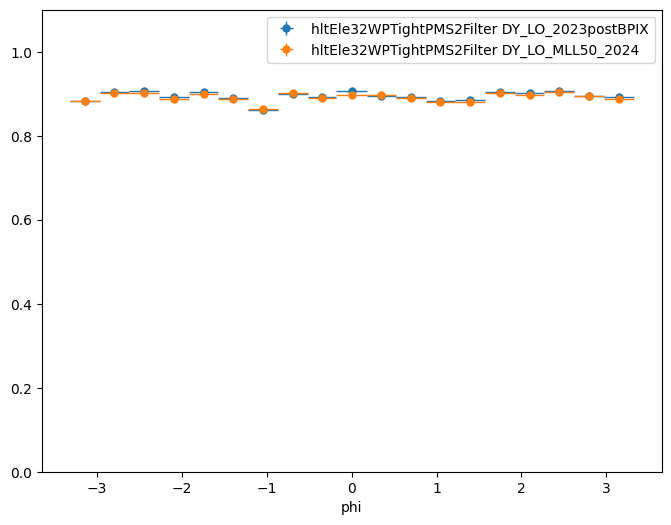

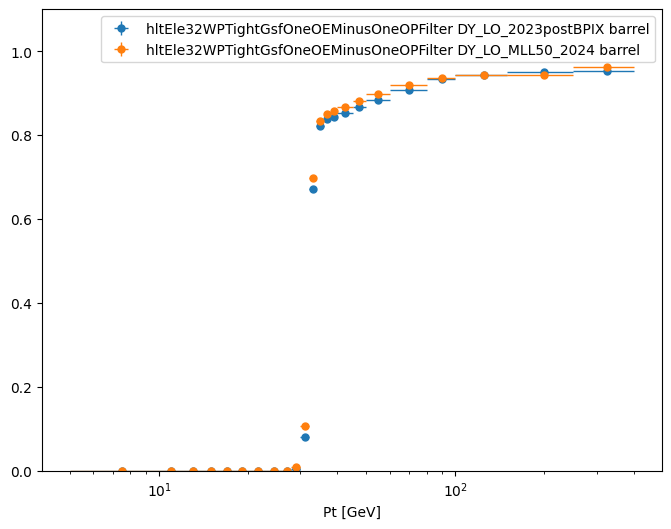

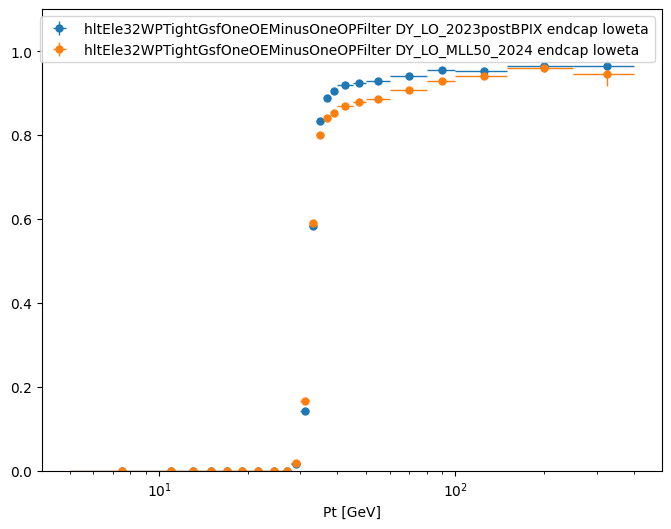

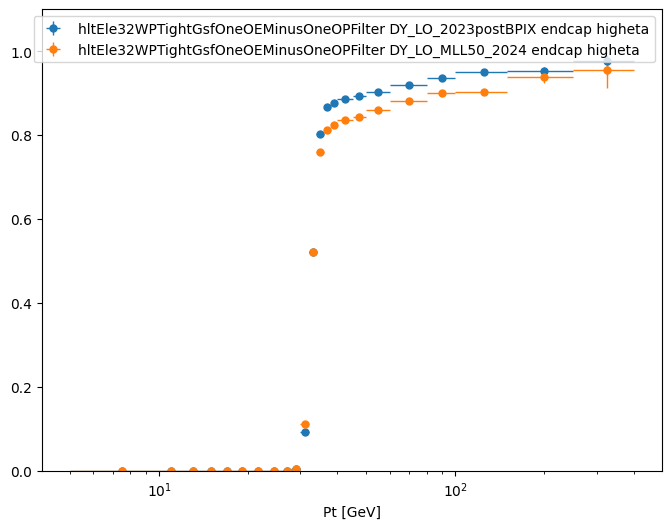

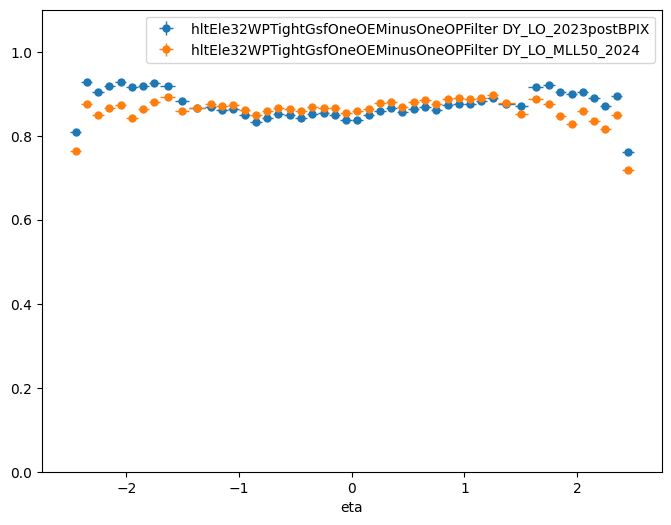

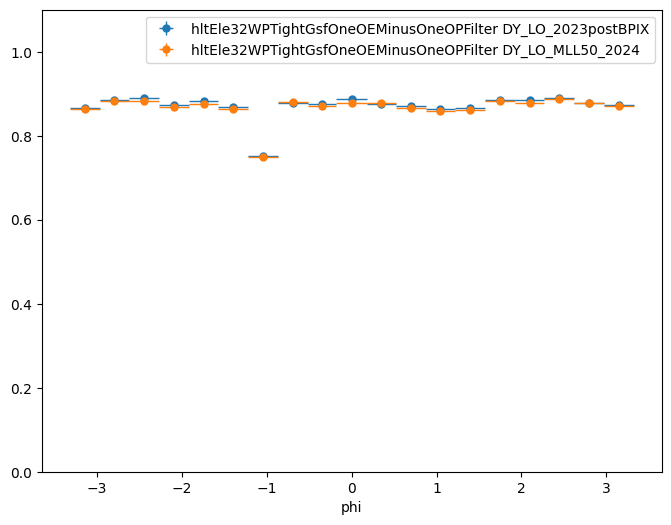

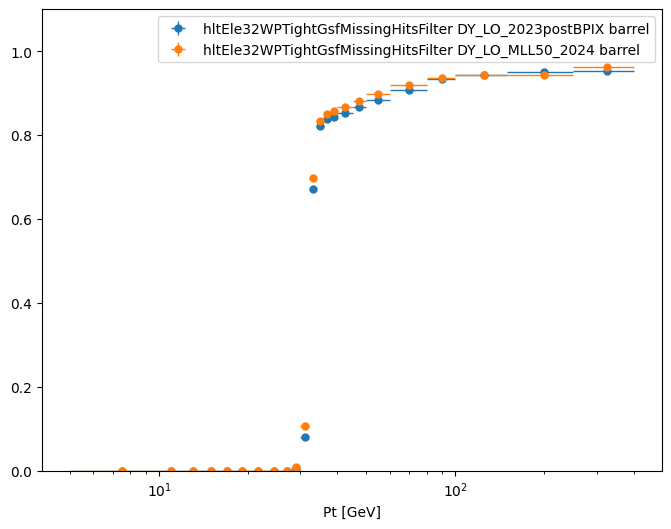

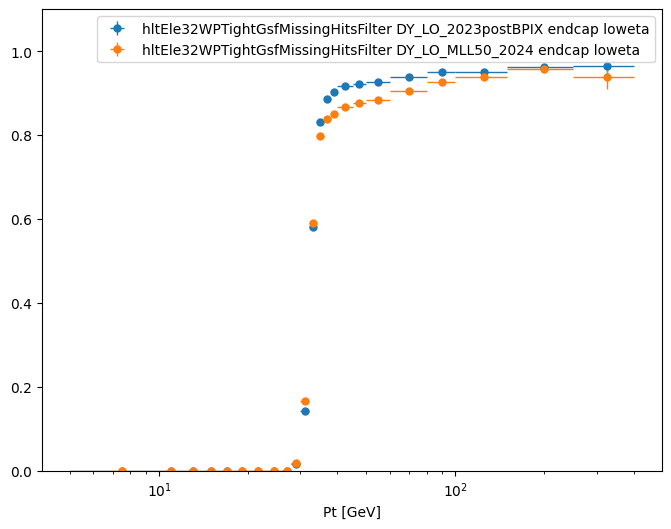

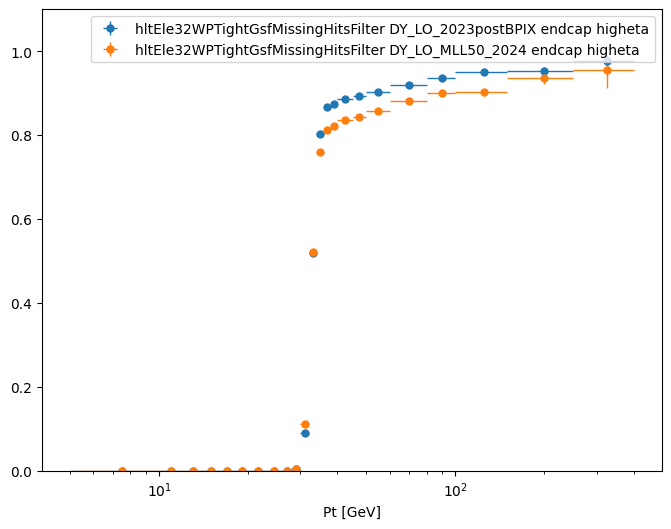

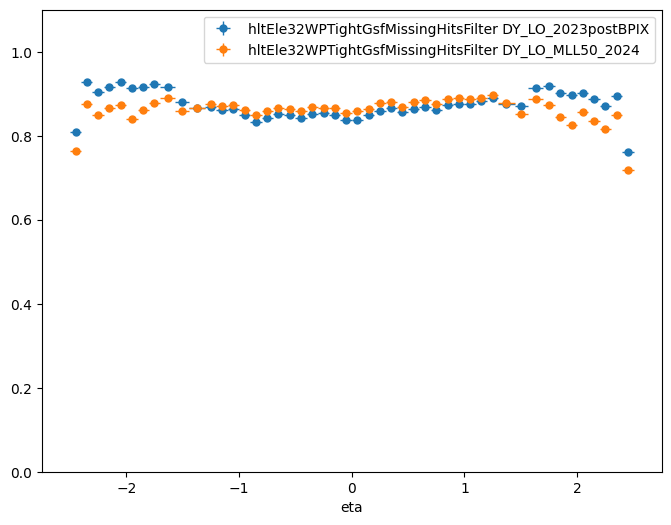

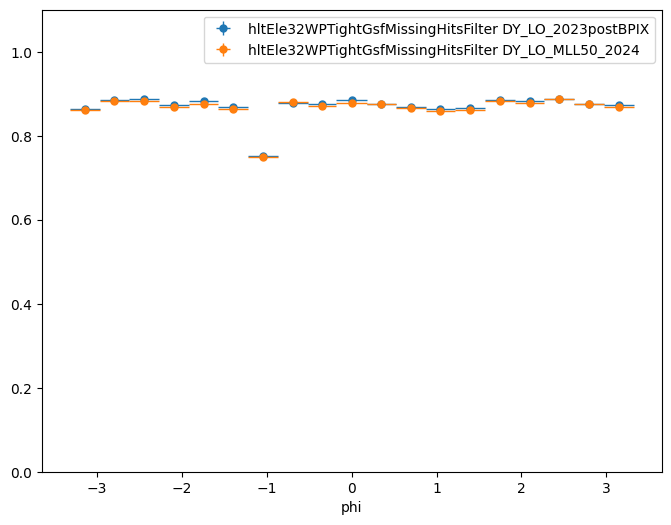

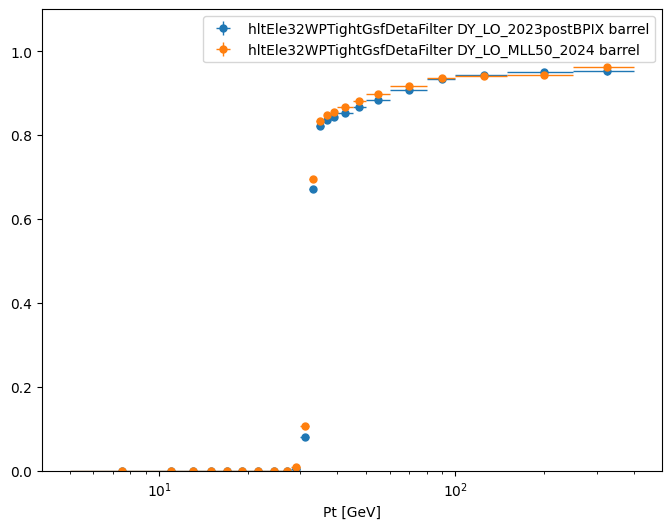

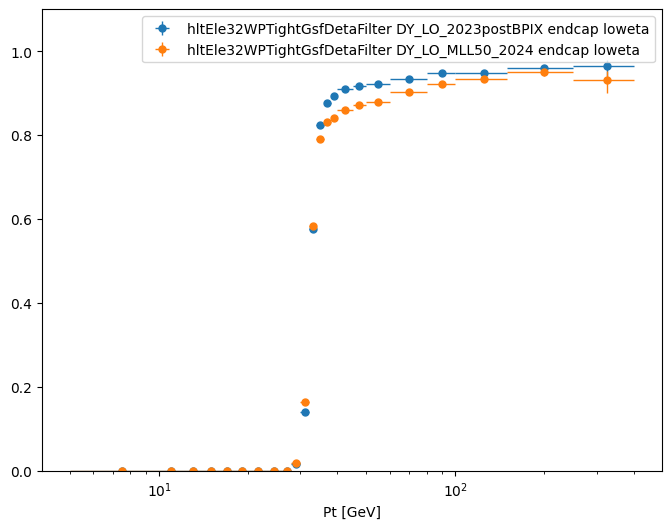

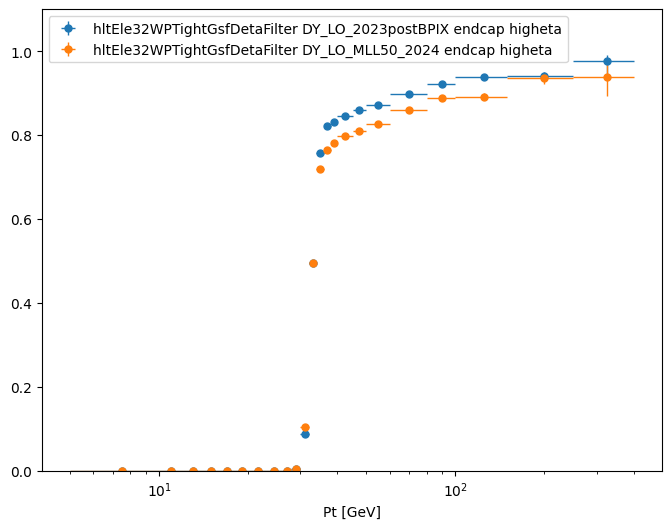

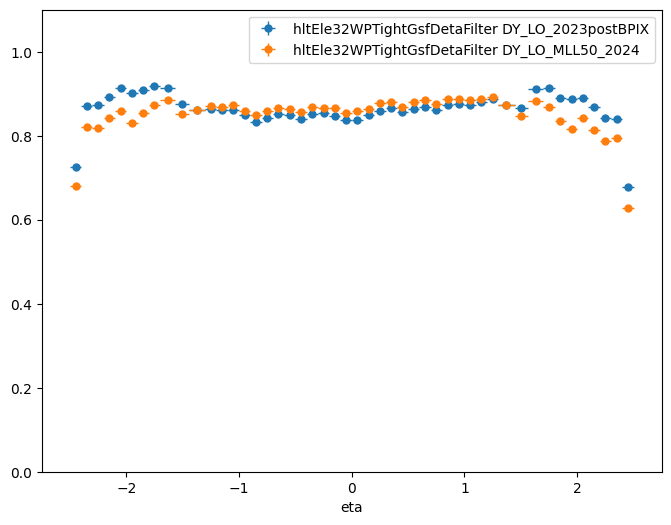

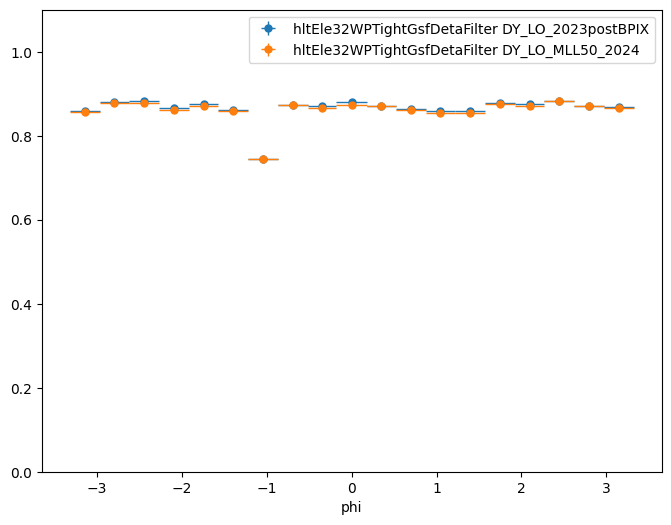

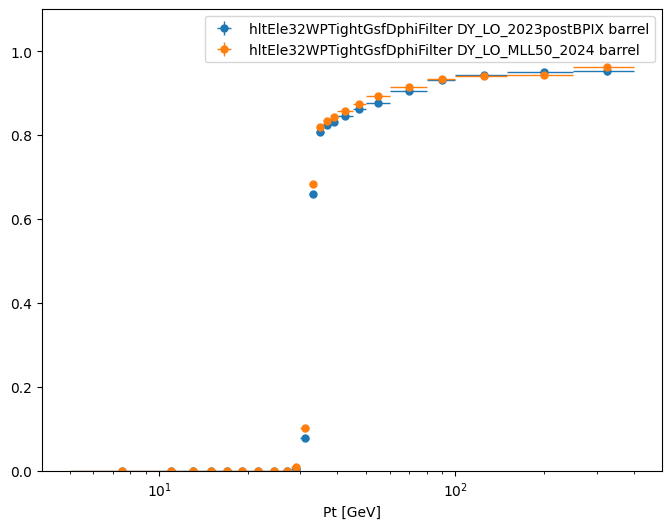

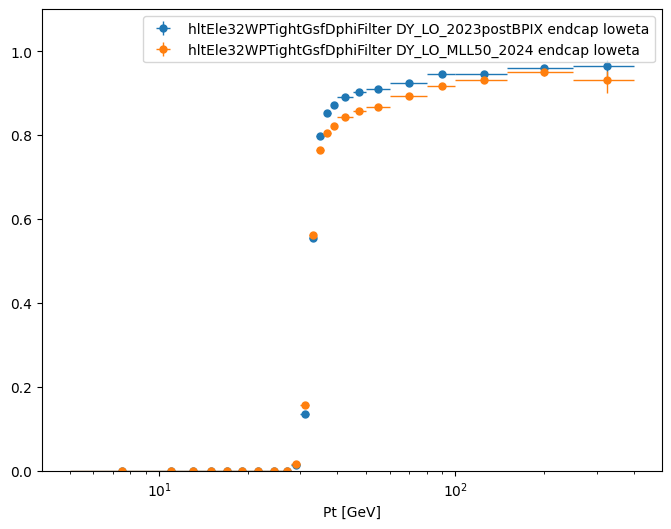

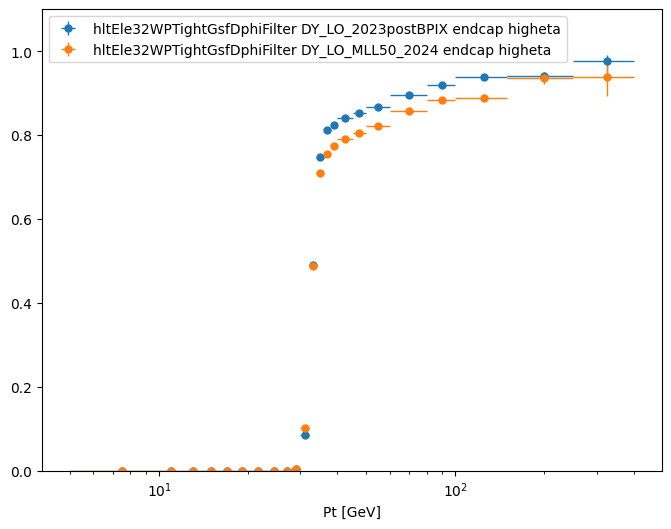

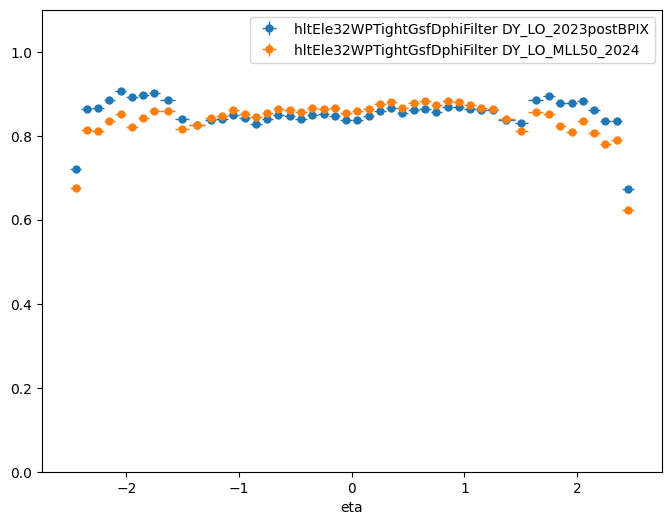

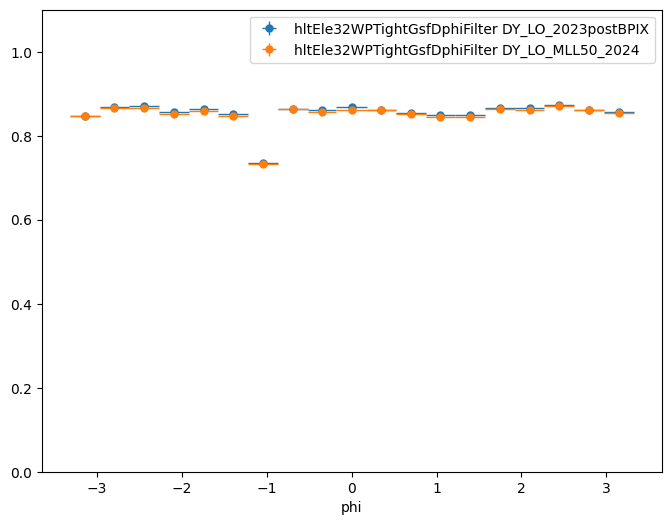

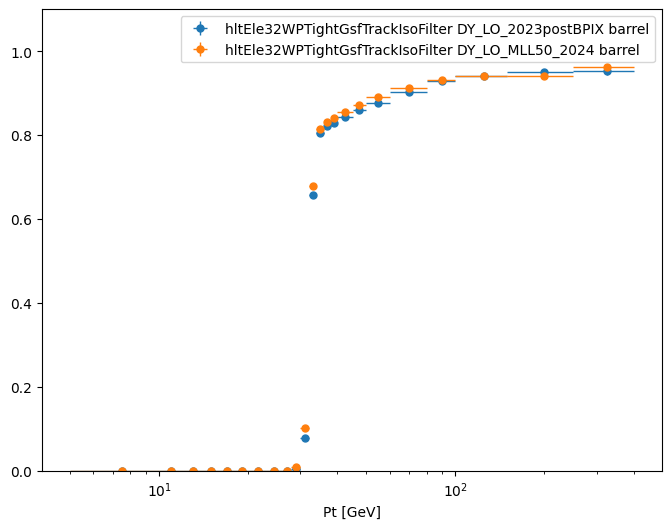

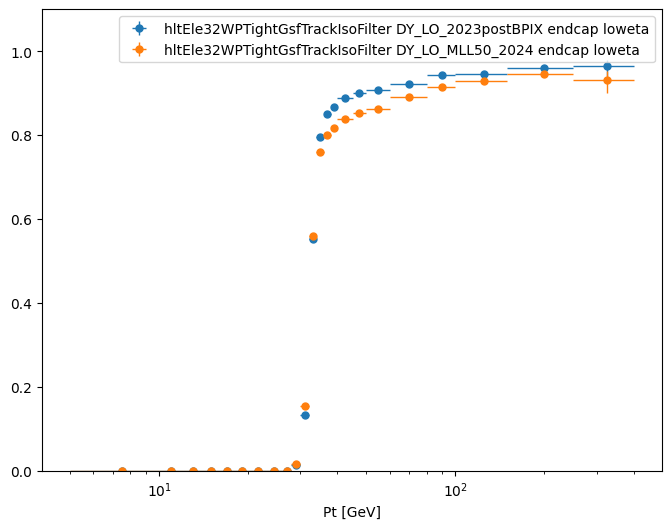

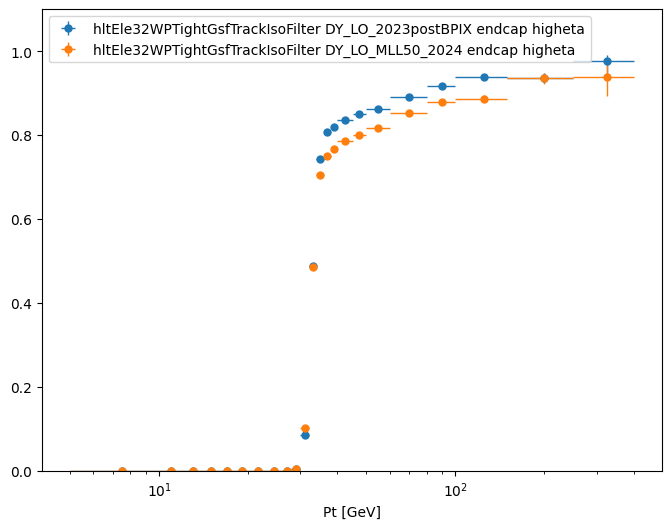

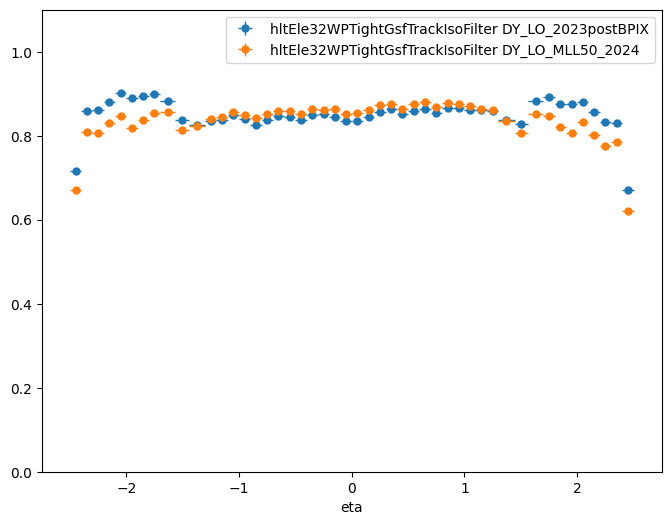

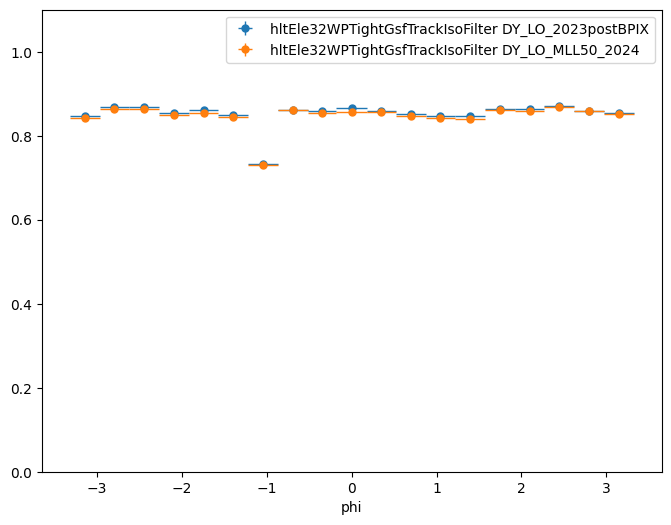

In [37]:
for filter in ele32_filters:
    all_hists = out[filter][0]
    plt.figure(figsize=(8, 6))
    for dataset, hists in all_hists.items():
        plot_efficiency(hists["pt"]["barrel"]["passing"], hists["pt"]["barrel"]["all"], label=f"{filter} {dataset} barrel")
    plt.ylim(0, 1.1)
    plt.xscale("log")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    for dataset, hists in all_hists.items():
        plot_efficiency(hists["pt"]["endcap_loweta"]["passing"], hists["pt"]["endcap_loweta"]["all"], label=f"{filter} {dataset} endcap loweta")
    plt.ylim(0, 1.1)
    plt.xscale("log")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    for dataset, hists in all_hists.items():
        plot_efficiency(hists["pt"]["endcap_higheta"]["passing"], hists["pt"]["endcap_higheta"]["all"], label=f"{filter} {dataset} endcap higheta")
    plt.ylim(0, 1.1)
    plt.xscale("log")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    for dataset, hists in all_hists.items():
        plot_efficiency(hists["eta"]["entire"]["passing"], hists["eta"]["entire"]["all"], label=f"{filter} {dataset}")
    plt.ylim(0, 1.1)
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    for dataset, hists in all_hists.items():
        plot_efficiency(hists["phi"]["entire"]["passing"], hists["phi"]["entire"]["all"], label=f"{filter} {dataset}")
    plt.ylim(0, 1.1)
    plt.legend()
    plt.show()